<a href="https://colab.research.google.com/github/Redcoder815/Machine_Learning/blob/main/PolynomialRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

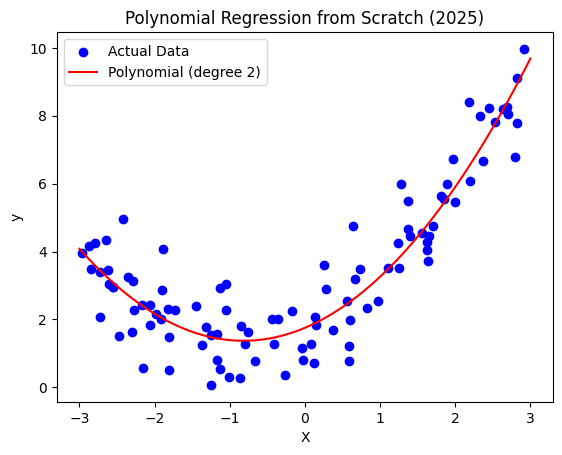

In [2]:
import numpy as np
import matplotlib.pyplot as plt

class PolynomialRegression:
    def __init__(self, degree=2, learning_rate=0.01, iterations=1000):
        self.degree = degree
        self.lr = learning_rate
        self.iters = iterations
        self.weights = None
        self.bias = None

    def transform_x(self, X):
        """Creates polynomial features: [x, x^2, ..., x^degree]"""
        X_poly = np.zeros((X.shape[0], self.degree))
        for d in range(self.degree):
            X_poly[:, d] = X.flatten() ** (d + 1)
        return X_poly

    def cost_function(self, y, y_hat):
        """Calculates Mean Squared Error (MSE)"""
        return np.mean((y_hat - y) ** 2)

    def fit(self, X, y):
        n_samples, _ = X.shape
        X_poly = self.transform_x(X)

        # Initialize parameters
        self.weights = np.zeros(self.degree)
        self.bias = 0
        self.cost_history = []

        # Gradient Descent
        for i in range(self.iters):
            y_hat = np.dot(X_poly, self.weights) + self.bias

            # Partial derivatives (gradients)
            dw = (1/n_samples) * np.dot(X_poly.T, (y_hat - y))
            db = (1/n_samples) * np.sum(y_hat - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            self.cost_history.append(self.cost_function(y, y_hat))

    def predict(self, X):
        X_poly = self.transform_x(X)
        return np.dot(X_poly, self.weights) + self.bias

# 3. Data Generation & Visualization
np.random.seed(42)
X = np.random.rand(100, 1) * 6 - 3 # Range [-3, 3]
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1) # Quadratic with noise
y = y.flatten()

# Train Model
model = PolynomialRegression(degree=2, learning_rate=0.01, iterations=1000)
model.fit(X, y)

# Plotting Results
X_range = np.linspace(-3, 3, 100).reshape(-1, 1)
y_pred = model.predict(X_range)

plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_range, y_pred, color='red', label=f'Polynomial (degree {model.degree})')
plt.title("Polynomial Regression from Scratch (2025)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()
